In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from matplotlib import rcParams
import sympy as sy
import scipy.constants as pc
from sympy import *
from math import log10, floor

In [64]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)], zMaxArray[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def einfachGaussMultMax(unsicherheiten, werte, exponenten):
    max_a = 0
    num = -1
    for i in range (unsicherheiten.size):
        maxi = (exponenten[i]*unsicherheiten[i]/werte[i])**2
        if max_a <= maxi:
            max_a = maxi
            num = i
    return (max_a, num)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]-(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def round_to_j(x,j):
    return round(x, (j-1)-int(floor(log10(abs(x)))))

def rounda_to_j(x,j):
    for i in range(len(x)):
        x[i] = round_to_j(x[i],j)
    return x


In [4]:
beta_rech = np.linspace(0.2, 5, 100)
gf_rech = 1+beta_rech**(-1)
bf_rech = beta_rech +1
ef_rech = 2+ beta_rech+ beta_rech**(-1)
#fig, ax = plt.subplots(figsize=(10,6))
#ax.tick_params(axis='both', which='major', labelsize=18)
#ax.tick_params(axis='both', which='minor', labelsize=16)
#ax.set_xscale('log')

#ax.plot(beta_rech, bf_rech, color='r', label=r'$\frac{b}{f}$')
#ax.plot(beta_rech, gf_rech, color='g', label=r'$\frac{g}{f}$ ')
#ax.plot(beta_rech, ef_rech, color='b', label=r'$\frac{e}{f}$ ')

#ax.set(xlabel=r'$\beta$', ylabel=r'Jeweilige Abhängigkeit', title=r'$\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$')
#ax.legend()
#ax.grid()

#fig.savefig("AbhBeta.svg")

[5.         3.66666667 3.         2.6        2.33333333 2.14285714
 2.         1.88888889 1.8        1.72727273 1.66666667 1.61538462
 1.57142857]
[1.29962547 1.41025641 1.52631579 1.64       1.78431373 1.88888889
 1.98765432 2.12676056 2.23076923 2.31147541 2.42857143 2.50943396
 2.6       ]
[6.29962547 5.07692308 4.52631579 4.24       4.11764706 4.03174603
 3.98765432 4.01564945 4.03076923 4.03874814 4.0952381  4.12481858
 4.17142857]

[0.05   0.033  0.025  0.02   0.017  0.014  0.012  0.011  0.01   0.0091
 0.0083 0.0077 0.0071]
[0.0084 0.011  0.015  0.018  0.022  0.025  0.028  0.031  0.034  0.037
 0.04   0.042  0.045 ]
[0.062 0.05  0.045 0.042 0.041 0.04  0.039 0.04  0.04  0.04  0.041 0.041
 0.041]

f gemessen, fehler 79.93990010982056 0.8207619854148238
phi gemessen, fehler 0.012509397667825592 0.00012843696392018356


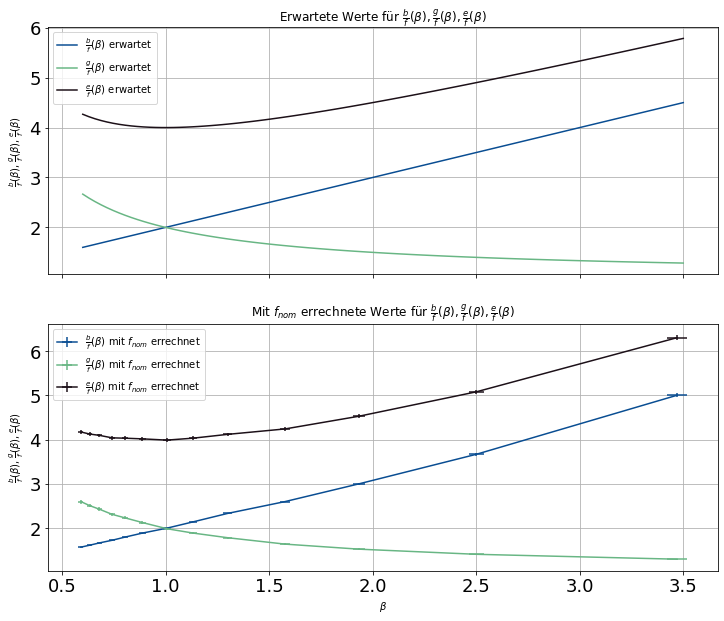

In [67]:
# Gemessene Werte Versuchteil 1
pos_dia = 200 #+- 1
e_gem_1 = np.array([647, 585, 552, 535, 522, 520, 521, 521, 525, 531, 536, 543, 550]) - pos_dia #sqrt(1^2+0.5^2)=sqrt(1.25)
g_gem_1 = np.array([300,310,320,330,340,350,360,370,380,390,400,410,420]) - pos_dia#<-- nice +-1
b_gem_1 = e_gem_1-g_gem_1

e_gem_1_f, g_gem_1_f = 2, 1
b_gem_1_f = np.sqrt(e_gem_1_f**2+g_gem_1_f**2) #Ich hab das mit der Formel gemacht, das geht so!

f_gem_1 = g_gem_1*b_gem_1/(g_gem_1_f+b_gem_1) #Brennweite

beta_gem_1 = b_gem_1/g_gem_1
beta_gem_1_f = (1/g_gem_1)*(np.sqrt((e_gem_1_f**2)+((e_gem_1/g_gem_1)**2)*(g_gem_1_f**2)))

#Nominelle Werte
f_nom_1 = 80 
f_nom_1_f = 0.1 
bf_nom_1 = (1-(f_nom_1/g_gem_1))**(-1)
bf_nom_1_f = bf_nom_1*(g_gem_1_f/g_gem_1)
gf_nom_1 = (1-(f_nom_1/b_gem_1))**(-1)
gf_nom_1_f = gf_nom_1*(b_gem_1_f/b_gem_1)
ef_nom_1 = (((1/f_nom_1)-(1/g_gem_1))**(-1)+((1/f_nom_1)-(1/b_gem_1))**(-1))/(f_nom_1)
ef_nom_1_f = ef_nom_1*(am([(b_gem_1_f/b_gem_1), (g_gem_1_f/g_gem_1)]))

roundto_bf = np.array([])

print(bf_nom_1)
print(gf_nom_1)
print(ef_nom_1)
print()
#print(bf_nom_1_f)
#print(gf_nom_1_f)
#print(ef_nom_1_f)
#print()
print(rounda_to_j(bf_nom_1_f,2))
print(rounda_to_j(gf_nom_1_f,2))
print(rounda_to_j(ef_nom_1_f,2))
print()




fig, (ax1, ax0) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,10))
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.tick_params(axis='both', which='minor', labelsize=16)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=16)

ax0.errorbar(beta_gem_1, bf_nom_1, xerr=beta_gem_1_f, yerr=bf_nom_1_f, 
             color='#094D92', label=r'$\frac{b}{f}(\beta)$ mit $f_{nom}$ errechnet')
ax0.errorbar(beta_gem_1, gf_nom_1, xerr=beta_gem_1_f, yerr=gf_nom_1_f, 
             color='#68B684', label=r'$\frac{g}{f}(\beta)$ mit $f_{nom}$ errechnet')
ax0.errorbar(beta_gem_1, ef_nom_1, xerr=beta_gem_1_f, yerr=ef_nom_1_f, 
             color='#1C1018', label=r'$\frac{e}{f}(\beta)$ mit $f_{nom}$ errechnet')

ax0.set(xlabel=r'$\beta$', ylabel=r'$\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$', 
       title=r'Mit $f_{nom}$ errechnete Werte für $\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$')
ax0.legend()
ax0.grid()

beta_rech = np.linspace(0.6, 3.5, 100)
gf_rech = 1+beta_rech**(-1)
bf_rech = beta_rech +1
ef_rech = 2+ beta_rech+ beta_rech**(-1)

ax1.plot(beta_rech, bf_rech, color='#094D92', label=r'$\frac{b}{f}(\beta)$ erwartet')
ax1.plot(beta_rech, gf_rech, color='#68B684', label=r'$\frac{g}{f}(\beta)$ erwartet')
ax1.plot(beta_rech, ef_rech, color='#1C1018', label=r'$\frac{e}{f}(\beta)$ erwartet')

ax1.set(xlabel=r'', ylabel=r'$\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$', 
       title=r'Erwartete Werte für $\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$')
ax1.legend()
ax1.grid()

fig.savefig("VT1Vergleich.svg")

f_gem_1 = am((g_gem_1/e_gem_1)*(e_gem_1-g_gem_1))
f_gem_1_f = am(np.sqrt((((g_gem_1-b_gem_1)**2)/(e_gem_1**2))*(e_gem_1_f**2)+(((g_gem_1/e_gem_1)**4)*(b_gem_1_f**2))+((b_gem_1/e_gem_1)**4)*(g_gem_1_f**2)))
phi_gem_1 = 1/f_gem_1
phi_gem_1_f = phi_gem_1*(f_gem_1_f/f_gem_1)
print('f gemessen, fehler',f_gem_1, f_gem_1_f)
print('phi gemessen, fehler', phi_gem_1, phi_gem_1_f)


In [58]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

In [50]:
# Gemessene Werte Versuchteil 2
g_gem_2 = np.array([300,310,320,330,340,350,360,370]) - pos_dia  
e_gem_2_unv = np.array([432,426,427,430,435,440,446,452]) - pos_dia #Unvertauschte Linsen
e_gem_2_ver = np.array([450,431,425,424,430,435,440,445]) - pos_dia #Vertauschte Linsen

d_2, d_2_f = 20, 1

g_gem_2_f, e_gem_2_f = 1, 2
b_gem_2_f = np.sqrt(e_gem_2_f**2+g_gem_1_f**2)

b_gem_2_unv = e_gem_2_unv-g_gem_2
b_gem_2_ver = e_gem_2_ver-g_gem_2

f_gem_2_unv = g_gem_2*b_gem_2_unv/(g_gem_2+b_gem_2_unv)
f_fem_2_ver = g_gem_2*b_gem_2_ver/(g_gem_2+b_gem_2_ver)

#BETAS

beta_gem_2_unv = b_gem_2_unv/g_gem_2
beta_gem_2_unv_f = (1/g_gem_2)*(np.sqrt((e_gem_2_f**2)+((e_gem_2_unv/g_gem_2)**2)*(g_gem_2_f**2)))

beta_gem_2_ver = b_gem_2_ver/g_gem_2
beta_gem_2_ver_f = (1/g_gem_2)*(np.sqrt((e_gem_2_f**2)+((e_gem_2_ver/g_gem_2)**2)*(g_gem_2_f**2)))

print(beta_gem_2_unv_f)
print(beta_gem_2_ver_f)

# F LINSENSYSTEM

f_1, f_2 = 80, 150
f_nom_2 = ((1/(f_1))+(1/(f_2)))**(-1)#-d_2/(f_1+f_2)**(-1)

#print(f_nom_2)
# NOMINELLE DATEN

bf_nom_2_unv = (1-(f_nom_2/g_gem_2))**(-1)
gf_nom_2_unv = (1-(f_nom_2/b_gem_2_unv))**(-1) 
ef_nom_2_unv = (((1/f_nom_2)-(1/g_gem_2))**(-1)+((1/f_nom_2)-(1/b_gem_2_unv))**(-1))/(f_nom_2)

bf_nom_2_unv_f = (1-(f_nom_2/g_gem_2_f))**(-1)
gf_nom_2_unv_f = (1-(f_nom_2/b_gem_2_f))**(-1)
ef_nom_2_unv_f = (((1/f_nom_2)-(1/g_gem_2_f))**(-1)+((1/f_nom_2)-(1/b_gem_2_f))**(-1))/(f_nom_2)

bf_nom_2_ver = (1-(f_nom_2/g_gem_2))**(-1)
gf_nom_2_ver = (1-(f_nom_2/b_gem_2_ver))**(-1) 
ef_nom_2_ver = (((1/f_nom_2)-(1/g_gem_2))**(-1)+((1/f_nom_2)-(1/b_gem_2_ver))**(-1))/(f_nom_2)

bf_nom_2_ver_f = (1-(f_nom_2/g_gem_2_f))**(-1)
gf_nom_2_ver_f = (1-(f_nom_2/b_gem_2_f))**(-1)
ef_nom_2_ver_f = (((1/f_nom_2)-(1/g_gem_2_f))**(-1)+((1/f_nom_2)-(1/b_gem_2_f))**(-1))/(f_nom_2)

print(bf_nom_2_unv)
print(gf_nom_2_unv)
print(ef_nom_2_unv)
print()
print(bf_nom_2_unv_f)
print(gf_nom_2_unv_f)
print(ef_nom_2_unv_f)
print()
print(bf_nom_2_ver)
print(gf_nom_2_ver)
print(ef_nom_2_ver)
print()
print(bf_nom_2_ver_f)
print(gf_nom_2_ver_f)
print(ef_nom_2_ver_f)
print()



round_array = np.array([bf_nom_2_unv, gf_nom_2_unv, ef_nom_2_unv, bf_nom_2_ver, gf_nom_2_ver, ef_nom_2_ver])
round_array2 = np.array([beta_gem_2_unv, beta_gem_2_ver])
round_to = np.array([2,2,2,2,3,3,3,3])
for i in range(len(round_array)):
    array_to_round = round_array[i]
    for j in range(len(array_to_round)):
        array_to_round[j] = round(array_to_round[j], 2)
        
print(round_array)




#
# PLOTS
# GEMESSENEN WERTE

# fig, (ax1, ax0) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,10))
# ax0.tick_params(axis='both', which='major', labelsize=18)
# ax0.tick_params(axis='both', which='minor', labelsize=16)
# ax1.tick_params(axis='both', which='major', labelsize=18)
# ax1.tick_params(axis='both', which='minor', labelsize=16)

# NORMALE LINSEN
# ax0.errorbar(beta_gem_2_unv, bf_nom_2_unv, xerr=beta_gem_2_unv_f, yerr=bf_nom_2_unv_f, 
#              color='#80ffdb', label=r'NP $\frac{b}{f}(\beta)$ err.')
# ax0.errorbar(beta_gem_2_unv, gf_nom_2_unv, xerr=beta_gem_2_unv_f, yerr=gf_nom_2_unv_f, 
#              color='#E0A458', label=r'NP $\frac{g}{f}(\beta)$ err.')
# ax0.errorbar(beta_gem_2_unv, ef_nom_2_unv, xerr=beta_gem_2_unv_f, yerr=ef_nom_2_unv_f, 
#              color='#C04ABC', label=r'NP $\frac{e}{f}(\beta)$ err.')

# VERDREHTE LINSEN

# ax0.errorbar(beta_gem_2_ver, bf_nom_2_ver, xerr=beta_gem_2_ver_f, yerr=bf_nom_2_ver_f, 
#              color='#094D92', label=r'RP $\frac{b}{f}(\beta)$ mit $f_{nom}$ err.')
# ax0.errorbar(beta_gem_2_ver, gf_nom_2_ver, xerr=beta_gem_2_ver_f, yerr=gf_nom_2_ver_f, 
#              color='#68B684', label=r'RP $\frac{g}{f}(\beta)$ mit $f_{nom}$ err.')
# ax0.errorbar(beta_gem_2_ver, ef_nom_2_ver, xerr=beta_gem_2_ver_f, yerr=ef_nom_2_ver_f, 
#              color='#1C1018', label=r'RP $\frac{e}{f}(\beta)$ mit $f_{nom}$ err.')


# ax0.set(xlabel=r'$\beta$', ylabel=r'$\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$', 
#        title=r'Mit $f_{nom}$ errechnete Werte für $\frac{b}{f}(\beta), \frac{g}{f}(\beta), \frac{e}{f}(\beta)$')
# # Shrink current axis's height by 10% on the bottom
# box = ax0.get_position()
# ax0.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# Put a legend below current axis
# ax0.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=3)

# ax0.grid()

# ERWARTETE WERTE
beta_rech = np.linspace(0.4, 1.5, 100)
gf_rech = 1+beta_rech**(-1)
bf_rech = beta_rech +1
ef_rech = 2+ beta_rech+ beta_rech**(-1)




f_gem_2 = am((g_gem_2/((e_gem_2_unv+e_gem_2_unv)/2))*(((e_gem_2_unv+e_gem_2_unv)/2)-g_gem_2))
f_gem_2_f = stu((g_gem_2/((e_gem_2_unv+e_gem_2_unv)/2))*(((e_gem_2_unv+e_gem_2_unv)/2)-g_gem_2))
phi_gem_2 = 1/f_gem_2
phi_gem_2_f = phi_gem_2*(f_gem_2_f/f_gem_2)
#print('f gemessen, fehler',f_gem_2, f_gem_2_f)
#print('phi gemessen, fehler', phi_gem_2, phi_gem_2_f)

# [2.09 1.9 1.77 1.67 1.59 1.53 1.48 1.44]
# [1.65 1.82 1.95 2.09 2.22 2.38 2.54 2.75]
# [3.74 3.72 3.72 3.76 3.81 3.91 4.03 4.19]
# [2.09 1.9 1.77 1.67 1.59 1.53 1.48 1.44]
# [1.53 1.76 1.99 2.25 2.38 2.59 2.88 3.29]
# [3.62 3.66 3.76 3.92 3.97 4.12 4.36 4.73]

[0.0306307  0.02606596 0.02294075 0.0205403  0.01865038 0.017075
 0.01576674 0.01464383]
[0.03201562 0.02636364 0.02284553 0.02030681 0.01848742 0.01693707
 0.015625   0.01450091]
[2.09090909 1.90225564 1.76923077 1.67039106 1.59405941 1.53333333
 1.48387097 1.44280443]
[1.65359477 1.81743869 1.95162569 2.09090909 2.21827411 2.37931034
 2.54241645 2.74927114]
[3.74450386 3.71969433 3.72085646 3.76130015 3.81233352 3.91264368
 4.02628742 4.19207557]

-0.01954120645709431
-0.04477702180671734
-0.06431822826381164

[2.09090909 1.90225564 1.76923077 1.67039106 1.59405941 1.53333333
 1.48387097 1.44280443]
[1.53333333 1.75805433 1.98765432 2.24740125 2.37931034 2.58940397
 2.875      3.28571429]
[3.62424242 3.66030997 3.75688509 3.91779231 3.97336975 4.12273731
 4.35887097 4.72851871]

-0.01954120645709431
-0.04477702180671734
-0.06431822826381164

[[2.09 1.9  1.77 1.67 1.59 1.53 1.48 1.44]
 [1.65 1.82 1.95 2.09 2.22 2.38 2.54 2.75]
 [3.74 3.72 3.72 3.76 3.81 3.91 4.03 4.19]
 [2.09 1.9  1.7

In [8]:
#Gemessene Werte


g_gem_3 = np.array([400,410,420,430,440,450,460,470])  
e_gem_3_unv = np.array([732,704,685,674,667,665,664,653]) #Unvertauschte Linsen
e_gem_3_ver = np.array([662,661,661,663,669,673,679,681]) #Vertauschte Linsen
Bg_gem_3_unv = np.array([15,12,11,10,8,8,7,6])
Bg_gem_3_ver = np.array([8,7,6,6,6,5,5,5])
print(g_gem_3)
print(e_gem_3_unv)
print(e_gem_3_ver)
print(Bg_gem_3_unv)
print(Bg_gem_3_ver)


[400 410 420 430 440 450 460 470]
[732 704 685 674 667 665 664 653]
[662 661 663 669 673 679 681]
[15 12 11 10  8  8  7  6]
[8 7 6 6 6 5 5 5]


In [ ]:
#Gemessene Werte 

f_4 = 250
f_gem_4_blau = 438
f_gem_4_rot = 446

